In [283]:
%matplotlib inline

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from skbayes.mixture_models import VBBMM

In [285]:
import seaborn as sns
sns.set(color_codes=True)

# Preprocess

In [286]:
targetDir = "../data/output/result/"
speedDir = "../data/output/speed/"
brakeDir = "../data/output/brake/"
accelDIr = "../data/output/accel/"
steeringPositiveDir = "../data/output/steeringPositive/"
steeringNegativeDir = "../data/output/steeringNegative/"

In [287]:
df1 = pd.read_csv(speedDir + "result.csv")
df2 = pd.read_csv(brakeDir + "result.csv")
df2.columns = [["id", "brake"]]
df3 = pd.read_csv(accelDIr + "result.csv")
df3.columns = [["id", "accel"]]
df4 = pd.read_csv(steeringPositiveDir + "result.csv")
df4.columns = [["id", "steeringPositive"]]
df5 = pd.read_csv(steeringNegativeDir + "result.csv")
df5.columns = [["id", "steeringNegative"]]

In [288]:
df = pd.merge(pd.merge(pd.merge(pd.merge(df1, df2, on="id"), df3, on="id"), df4, on="id"), df5, on="id")

In [289]:
rmf = df[df['red'] + df['yellow'] + df['green'] + df['stop'] > 0]
rmf = rmf[["red", "yellow", "green", "stop", "brake", "accel", "steeringPositive",  "steeringNegative"]]
rmf.columns = ["red", "yellow", "green", "slow", "brake", "accel", "steeringPositive",  "steeringNegative"]

In [290]:
rmf.describe()

,red,yellow,green,slow,brake,accel,steeringPositive,steeringNegative
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,24.628866,142.494845,70.706186,127.809278,40.561856,59.819588,43.994845,69.077320
std,42.578259,115.097312,124.268434,342.086072,58.297600,73.636859,101.566257,199.483632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36.750000,0.000000,0.000000,1.000000,8.250000,0.000000,0.000000
50%,3.000000,136.500000,5.000000,1.000000,15.000000,23.000000,1.000000,2.000000
75%,26.750000,218.500000,94.750000,26.500000,55.000000,89.500000,22.000000,23.750000
max,188.000000,543.000000,709.000000,2380.000000,321.000000,389.000000,523.000000,1460.000000


In [291]:
colors = [
    "#ff0000",
    "#ffa500",
    "#ffff00",
    "#008000",
    "#00ffff",
    "#0000ff",
    "#800080"
]

# VBGMM

In [292]:
rmf["sum"] = rmf["red"] + rmf["yellow"] + rmf["green"] + rmf["slow"] + rmf["brake"] + rmf["accel"] + rmf["steeringPositive"] + rmf["steeringNegative"]

for key in rmf.columns:
    if key == "sum":
        continue
    rmf[key] = rmf[key] / rmf["sum"]
    
rmf = rmf[["red", "yellow", "green", "slow", "brake", "accel", "steeringPositive", "steeringNegative"]]

In [293]:
vb = BayesianGaussianMixture(n_components=7, weight_concentration_prior=0.1, n_init=5).fit(rmf)
print "classes:          ", set(vb.predict(rmf))
print "lower bound: ", vb.lower_bound_

classes:           set([0, 1, 2, 3, 4, 5, 6])
lower bound:  5218.29681798


In [294]:
vb.weights_

array([ 0.21768615,  0.08575371,  0.24117927,  0.15562854,  0.10088736,
        0.18910791,  0.00975707])

In [295]:
ref = pd.DataFrame(vb.means_)
ref.columns = [["red", "yellow", "green", "slow", "brake", "accel", "steeringPositive", "steeringNegative"]]
ref

,red,yellow,green,slow,brake,accel,steeringPositive,steeringNegative
0,0.063196,0.617474,0.035097,0.009942,0.125209,0.102221,0.022890,0.023972
1,0.013332,0.208845,0.192934,0.197158,0.083628,0.121331,0.118379,0.064392
2,0.378537,0.494504,0.009784,0.006378,0.019691,0.082378,0.004462,0.004266
3,0.021667,0.401068,0.143022,0.021080,0.070603,0.145304,0.184963,0.012294
4,0.070904,0.398585,0.048423,0.006064,0.033980,0.118696,0.009516,0.313832
5,0.005389,0.135804,0.174318,0.357403,0.070022,0.100930,0.027698,0.128437
6,0.373823,0.132213,0.029194,0.031510,0.022193,0.035408,0.352022,0.023638


# Check the summation of each columns equal 1.0

In [296]:
res = ref.as_matrix()
[np.sum(res[i]) for i in range(len(res))]

[1.0,
 1.0,
 0.99999999999999978,
 1.0000000000000004,
 0.99999999999999922,
 1.0,
 0.99999999999999911]

# Plot histgram of each clusters

## Middle speed and no steering

(0, 1)

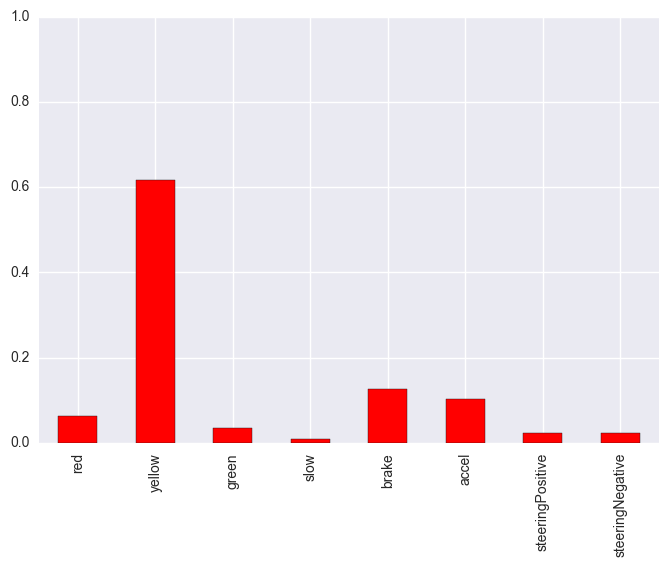

In [297]:
ref.ix[0].plot(kind='bar', color=colors[0])
plt.ylim(0, 1)

## Everything mediocre

(0, 1)

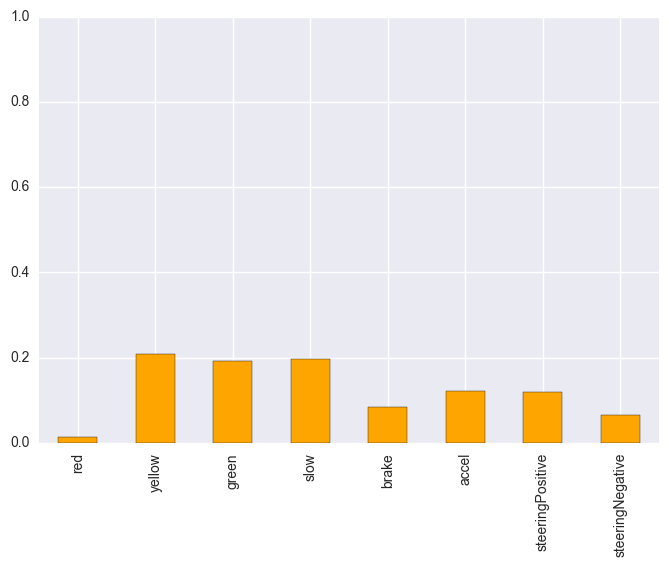

In [298]:
ref.ix[1].plot(kind='bar', color=colors[1])
plt.ylim(0, 1)

## High speed and no steering

(0, 1)

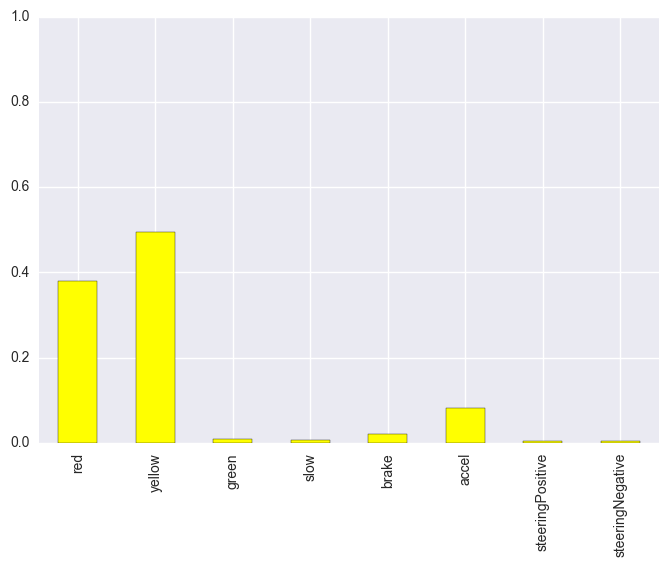

In [299]:
ref.ix[2].plot(kind='bar', color=colors[2])
plt.ylim(0, 1)

## Middle speed and turn left

(0, 1)

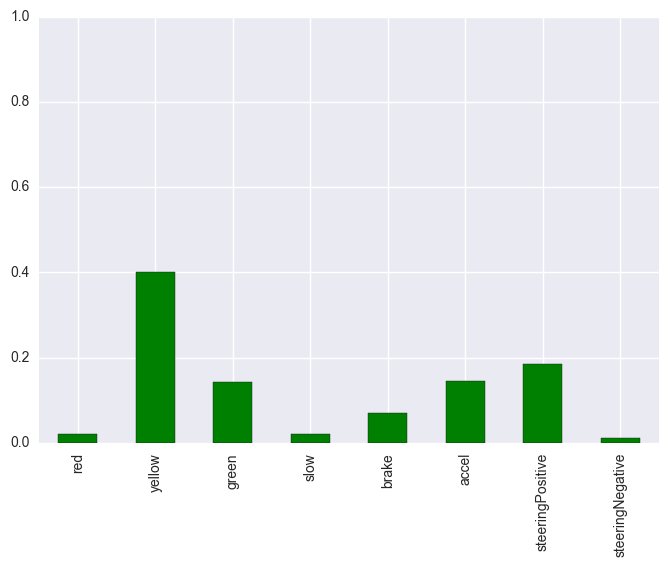

In [300]:
ref.ix[3].plot(kind='bar', color=colors[3])
plt.ylim(0, 1)

## Middle speed and trun right

(0, 1)

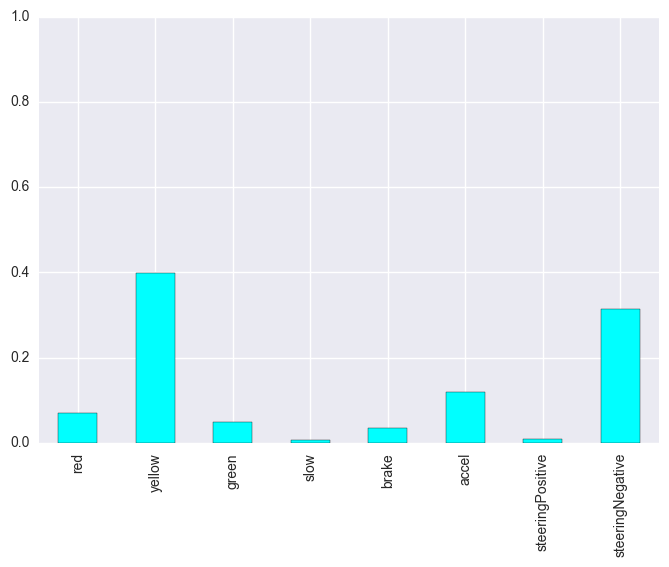

In [301]:
ref.ix[4].plot(kind='bar', color=colors[4])
plt.ylim(0, 1)

## Infront of intersection

(0, 1)

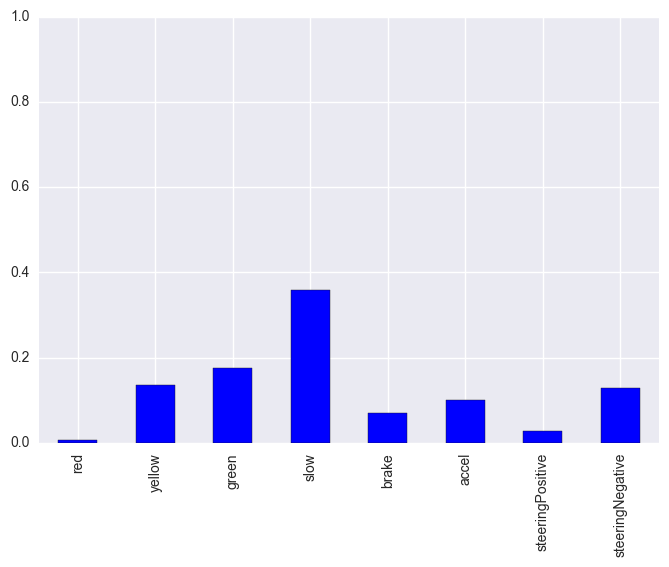

In [302]:
ref.ix[5].plot(kind='bar', color=colors[5])
plt.ylim(0, 1)

## High speed and turn left

(0, 1)

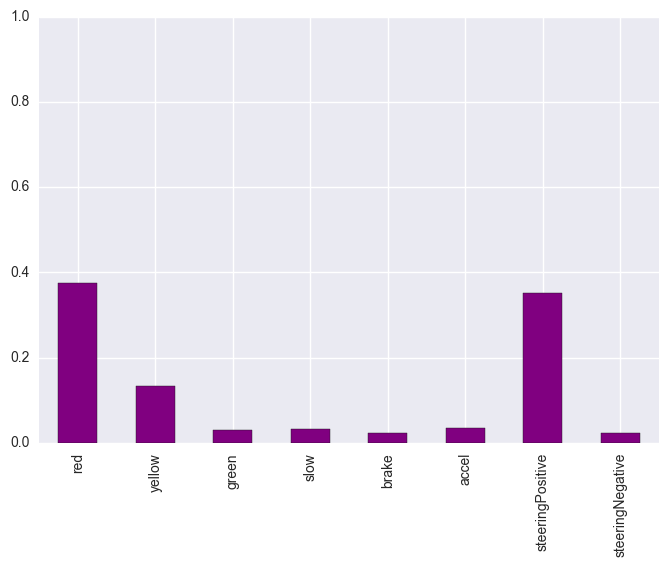

In [303]:
ref.ix[6].plot(kind='bar', color=colors[6])
plt.ylim(0, 1)

In [304]:
pred = zip(rmf.index, vb.predict(rmf))
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "aaaa.csv", result, delimiter=",", fmt="%d")